In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_excel("/content/Assignment-1_Data.xlsx")
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
def retail_data_prep(dataframe):
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

df = retail_data_prep(df)

df.describe().T


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Quantity,519551.0,9.397420,21.281261,1.000,1.00,3.00,10.00,248.50
Price,519551.0,3.326470,3.877380,0.001,1.25,2.08,4.13,41.94
CustomerID,387985.0,15317.042994,1721.813298,12346.000,13950.00,15265.00,16837.00,18287.00


In [ ]:
df_fr = df[df['Country'] == "France"]

df_fr.groupby(['BillNo', 'Itemname']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Quantity                                                                                                                   
Itemname 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES 12 PENCIL SMALL TUBE WOODLAND
BillNo                                                                                                                                            
536370                      0.0                        0.0                       0.0                             0.0                           0.0
536852                      0.0                        0.0                       0.0                             0.0                           0.0
536974                      0.0                        0.0                       0.0                             0.0                           0.0
537065                      0.0                        0.0                       0.0                             0.0                           0.0
537463                      0.0                        0.0                       0.0                             0.0                           0.0

In [ ]:
fr_inv_pro_df=df_fr.groupby(['BillNo', 'Itemname']). \
                agg({"Quantity": "sum"}). \
                unstack(). \
                fillna(0). \
                applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(fr_inv_pro_df.astype("bool"),
                            min_support=0.01,
                            use_colnames=True)


frequent_itemsets.sort_values("support", ascending=False).head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
330,0.765306,"((Quantity, POSTAGE))"
332,0.188776,"((Quantity, RABBIT NIGHT LIGHT))"
371,0.181122,"((Quantity, RED TOADSTOOL LED NIGHT LIGHT))"
320,0.170918,"((Quantity, PLASTERS IN TIN WOODLAND ANIMALS))"
315,0.168367,"((Quantity, PLASTERS IN TIN CIRCUS PARADE))"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

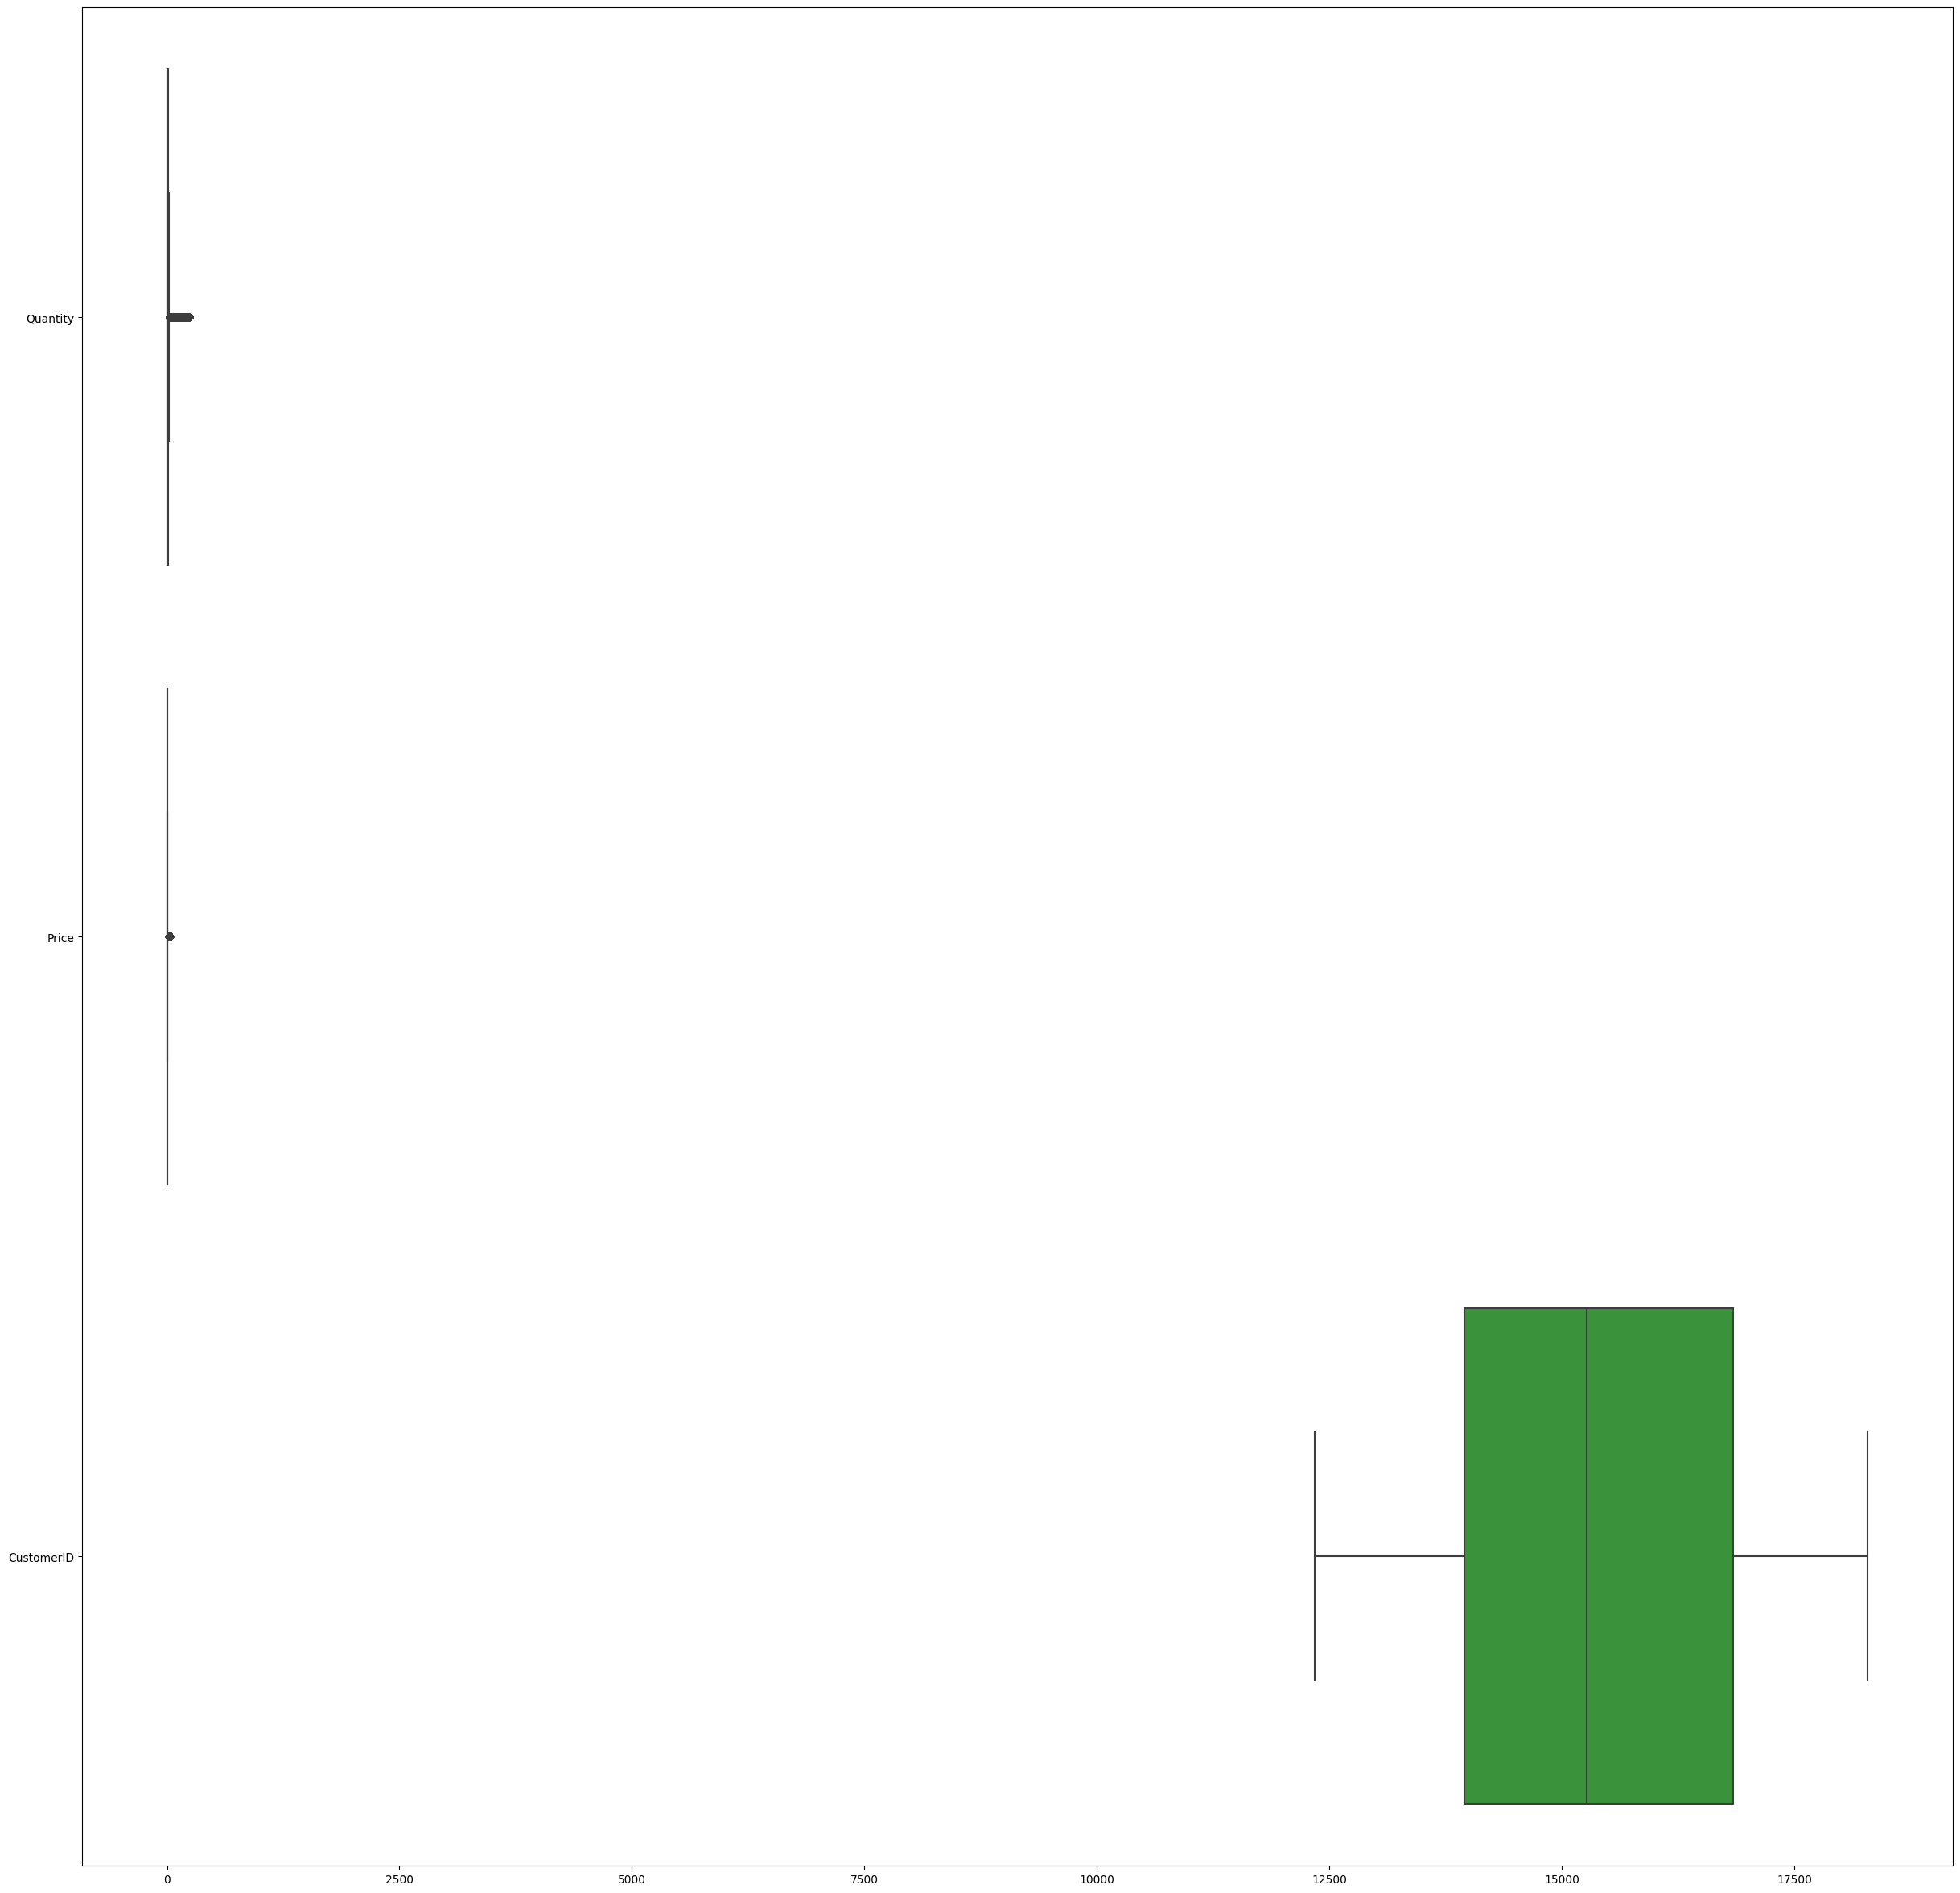

In [ ]:
plt.figure(figsize=(30,30))
sns.boxplot(df,orient='h')
plt.show

In [27]:
list1=['Quantity','Price']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
for c in list1:
  col=df[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  length=len(col[(col<lower) | (col>upper)])
  print(f"Outlier on  {c}    is {length}")
  print("                   ")

Outlier on  Quantity    is 54128
                   
Outlier on  Price    is 36939
                   


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
for c in list1:
  col=df[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  col[col<lower]=lower
  col[col>upper]=upper
  print("completed")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-ff0c20f2ab55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col<lower]=lower
<ipython-input-30-ff0c20f2ab55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col>upper]=upper


completed


<ipython-input-30-ff0c20f2ab55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col<lower]=lower
<ipython-input-30-ff0c20f2ab55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col>upper]=upper


completed


In [31]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 519551 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      519551 non-null  object        
 1   Itemname    519551 non-null  object        
 2   Quantity    519551 non-null  float64       
 3   Date        519551 non-null  datetime64[ns]
 4   Price       519551 non-null  float64       
 5   CustomerID  387985 non-null  float64       
 6   Country     519551 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 31.7+ MB


In [32]:
df.dropna(axis=1,inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519551 entries, 0 to 522063
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   BillNo    519551 non-null  object        
 1   Itemname  519551 non-null  object        
 2   Quantity  519551 non-null  float64       
 3   Date      519551 non-null  datetime64[ns]
 4   Price     519551 non-null  float64       
 5   Country   519551 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 27.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

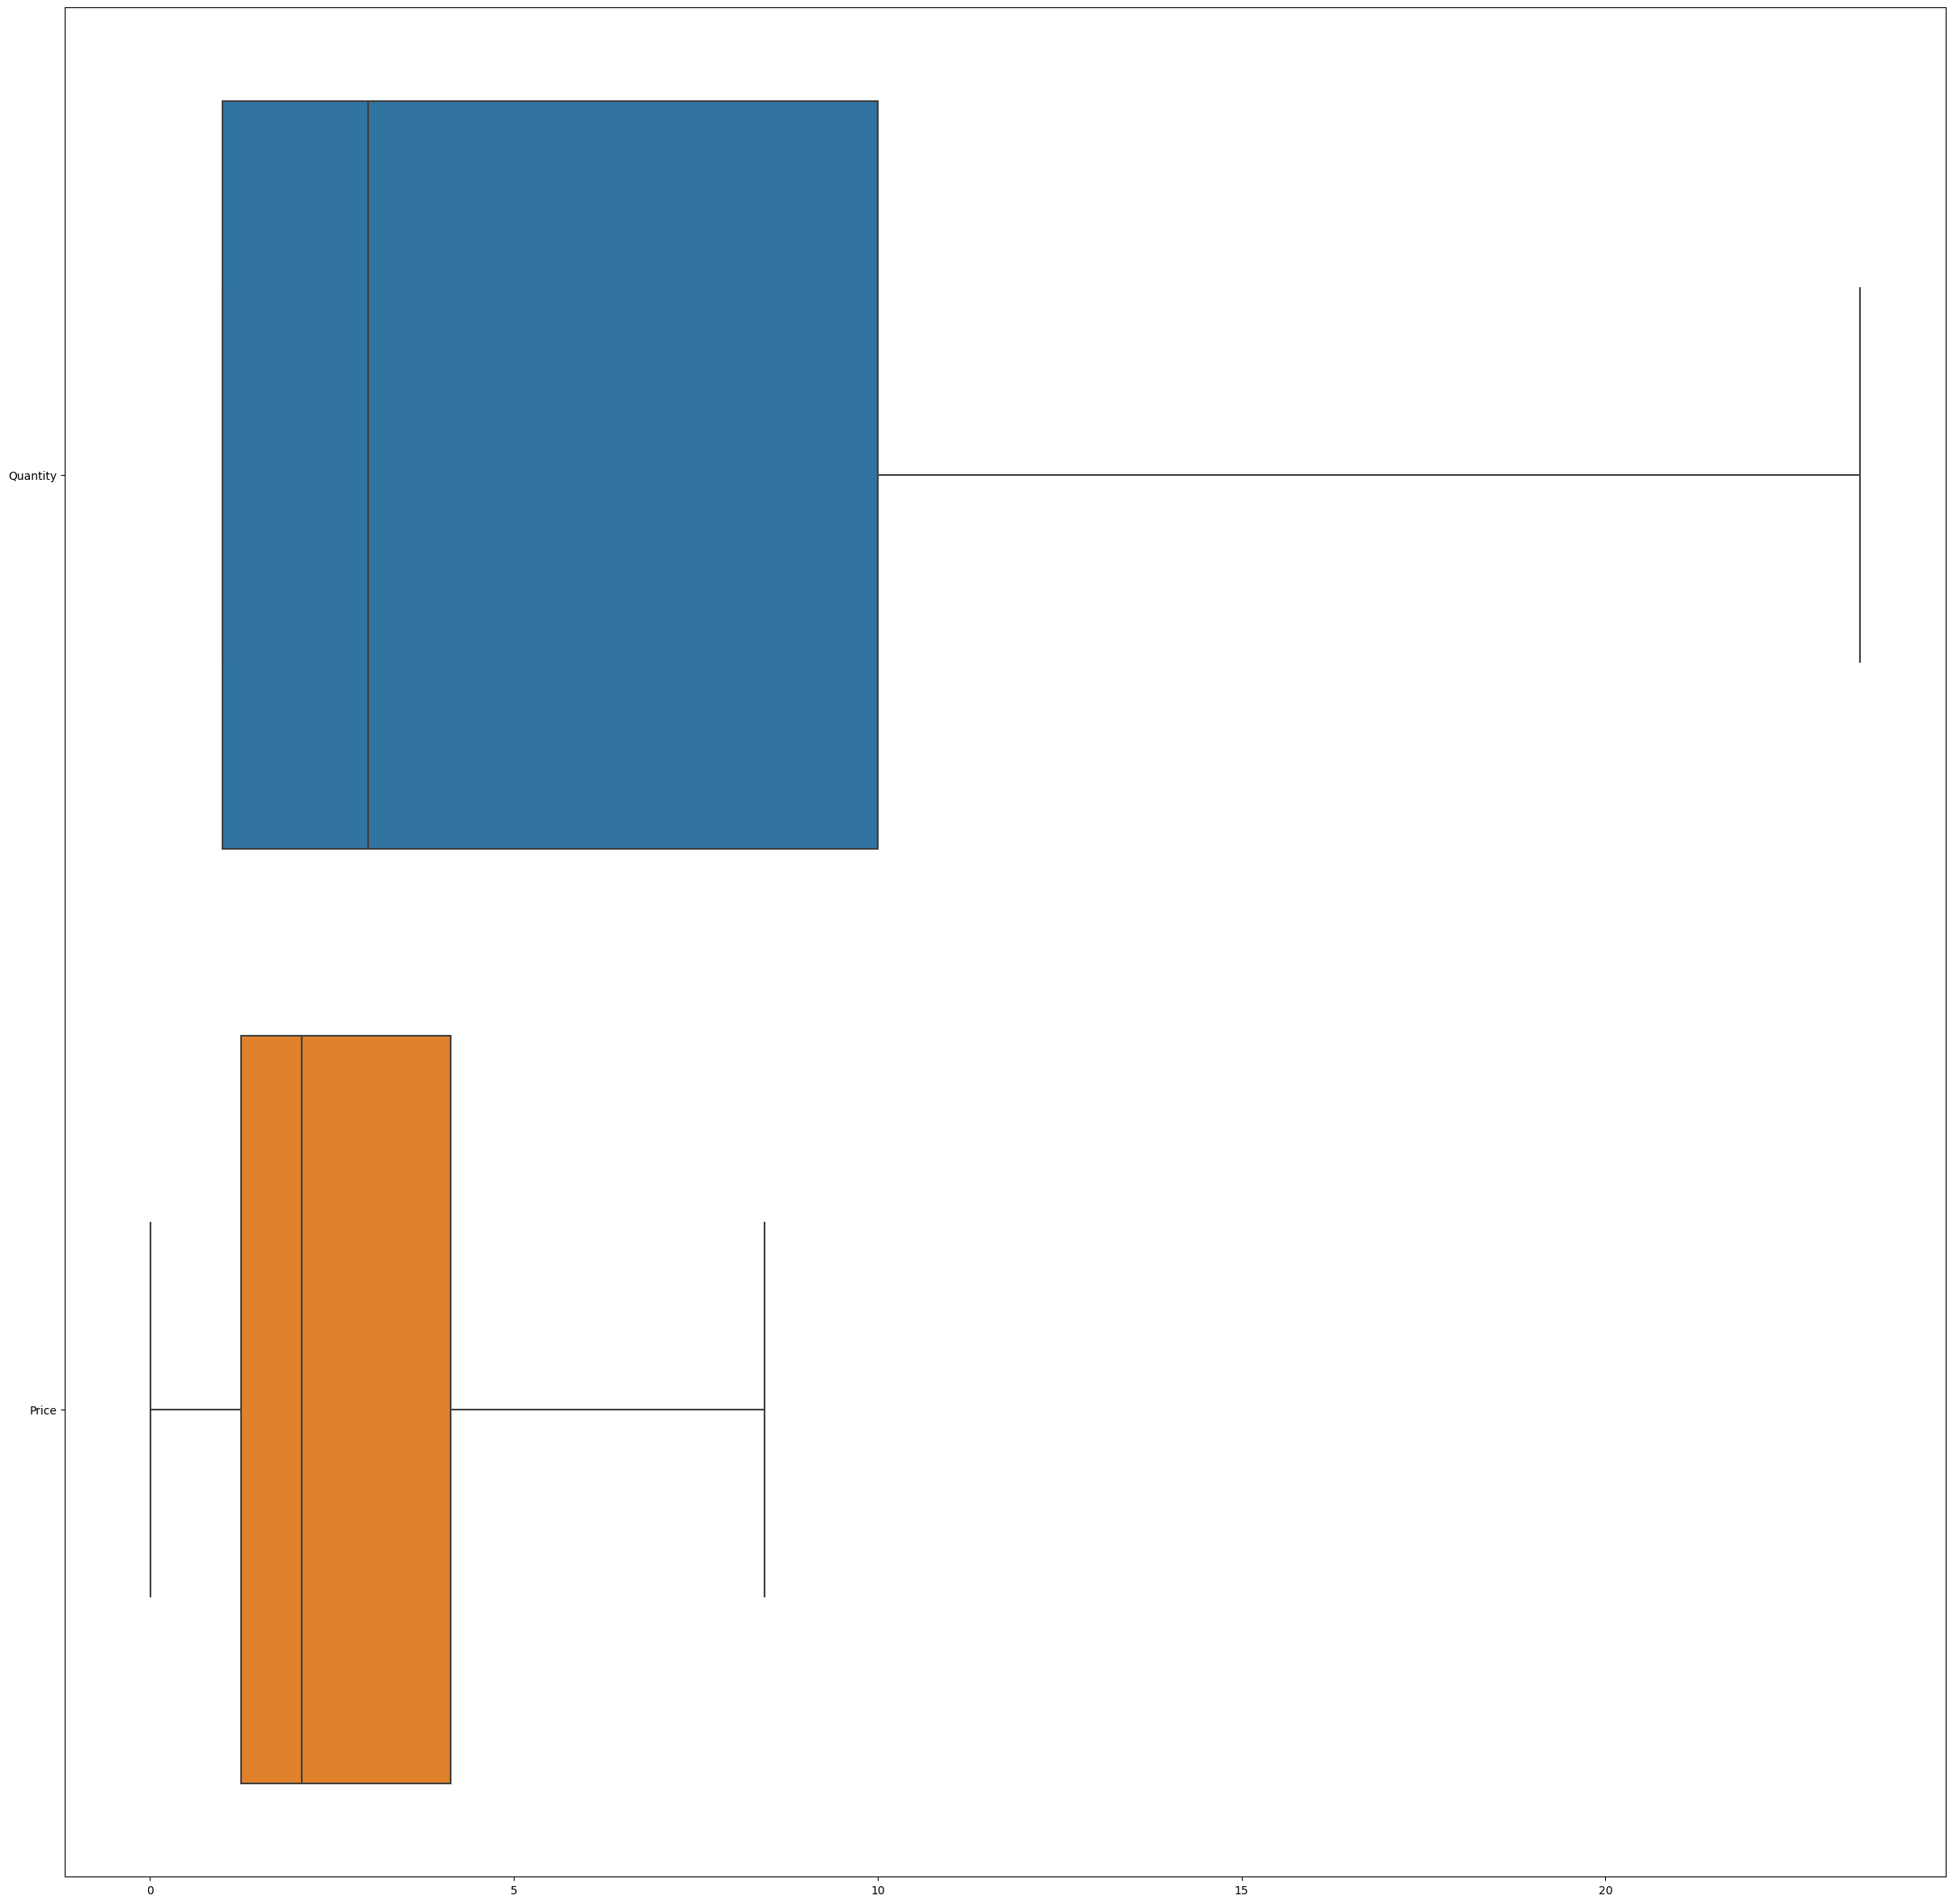

In [34]:
plt.figure(figsize=(30,30))
sns.boxplot(df,orient='h')
plt.show

In [36]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,United Kingdom


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<function matplotlib.pyplot.show(close=None, block=None)>

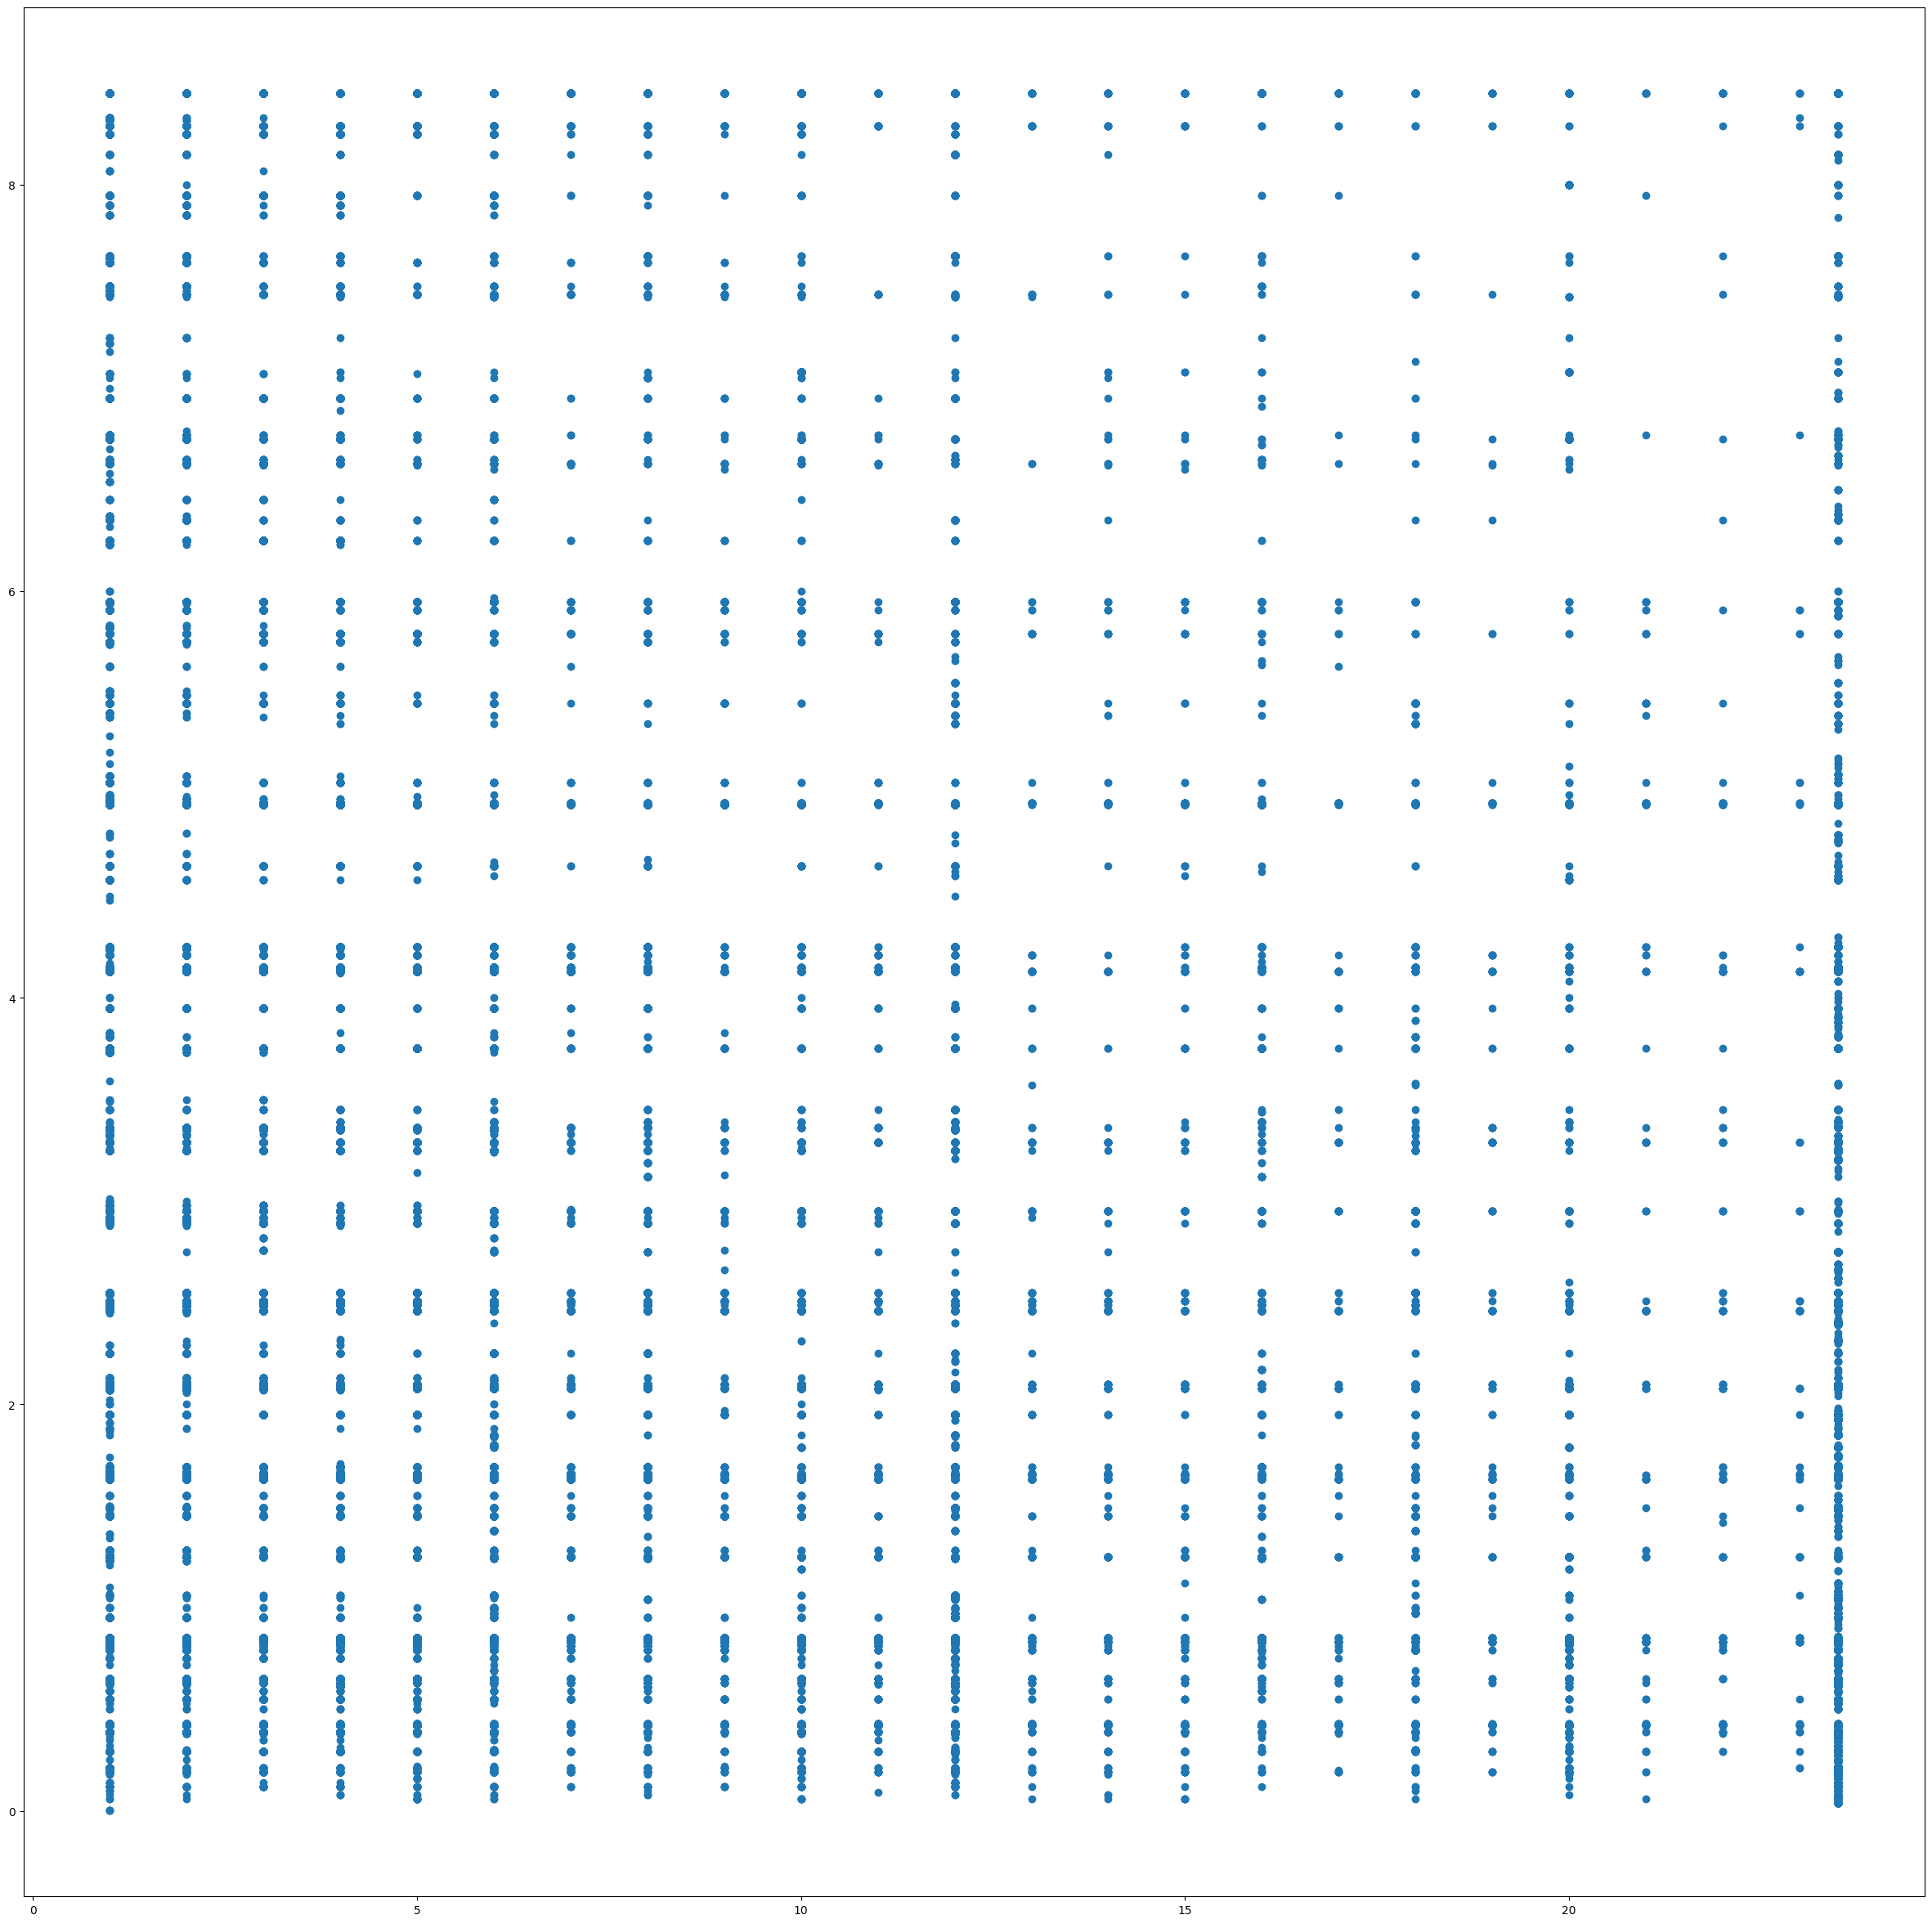

In [38]:
plt.figure(figsize=(30,30))
plt.scatter(x=df["Quantity"],y=df["Price"])
plt.show